In [1]:
# pip install ucimlrepo

## Load the dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### The data are already divided into features and target. Look at data

In [2]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [3]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [4]:
print(X.shape)  # Shape of the features DataFrame
print(y.shape)  # Shape of the targets DataFrame (if applicable)


(48842, 14)
(48842, 1)


In [5]:
print(X.info())  # Information about the features DataFrame
print(y.info())  # Information about the targets DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Co

In [6]:
print(X.describe())  # Descriptive statistics for the features DataFrame


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


### Look at all the unique values in dataset

In [7]:
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique values for workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Unique values for fnlwgt:
[ 77516  83311 215646 ... 173449  89686 350977]

Unique values for education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values for education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values for occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' '

### Can see some null values and some values with '?' . Change all '?' to null

In [8]:
# Check for '?' in the DataFrame
question_mark_count = (X == '?').sum()

# Check for NaN values in the DataFrame
nan_count = X.isnull().sum()

print(f"Count of '?' values:\n{question_mark_count}\n")
print(f"Count of NaN values:\n{nan_count}\n")


Count of '?' values:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

Count of NaN values:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64



In [9]:
import pandas as pd

In [10]:
# Replace '?' with NaN
X.replace('?', pd.NA, inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\418228730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', pd.NA, inplace=True)


In [11]:
# Check for NaN values in the DataFrame
nan_count = X.isnull().sum()
print(nan_count)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64


In [12]:
# Find the mode for each column
modes = X.mode()

# Display the modes
print("Mode for each column:")
print(modes)


Mode for each column:
   age workclass  fnlwgt education  education-num      marital-status  \
0   36   Private  203488   HS-grad              9  Married-civ-spouse   

       occupation relationship   race   sex  capital-gain  capital-loss  \
0  Prof-specialty      Husband  White  Male             0             0   

   hours-per-week native-country  
0              40  United-States  


In [13]:
# Find the mode for the 'workclass' column
workclass_mode = X['workclass'].mode()[0]

# Fill missing values in the 'workclass' column with its mode
X['workclass'].fillna(workclass_mode, inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\2728689717.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['workclass'].fillna(workclass_mode, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\2728689717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].fillna(workclass_mode, inplace=True)


In [14]:
print(X['workclass'].isnull().sum())  # Check for null values in the 'workclass' column

0


In [15]:
# Find the mode for the 'workclass' column
occupation_mode = X['occupation'].mode()[0]

# Fill missing values in the 'workclass' column with its mode
X['occupation'].fillna(occupation_mode, inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\2223002983.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['occupation'].fillna(occupation_mode, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\2223002983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].fillna(occupation_mode, inplace=True)


In [16]:
print(X['occupation'].isnull().sum())  # Check for null values in the 'occupation' column

0


In [17]:
# Find the mode for the 'workclass' column
country_mode = X['native-country'].mode()[0]

# Fill missing values in the 'workclass' column with its mode
X['native-country'].fillna(country_mode, inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\56948584.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['native-country'].fillna(country_mode, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\56948584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'].fillna(country_mode, inplace=True)


In [18]:
print(X['native-country'].isnull().sum())  # Check for null values in the 'occupation' column

0


In [19]:
# Check for NaN values in the DataFrame
nan_count = X.isnull().sum()
print(nan_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


### Format income column

In [20]:
# Reformat income Column 
y['income']=y['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
y.head(4)

C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\4208962115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income']=y['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})


,income
0,0
1,0
2,0
3,0


### Define the numerical and categorical features

In [27]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

# Identify Categorical features
categorical_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

### See how much of greater than and lower than incomes

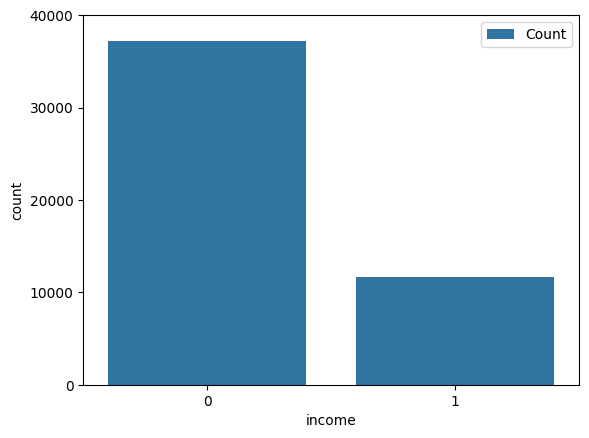

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of >50K & <=50K
sns.countplot(x='income',data=y, label="Count")
plt.yticks(range(0, 50000, 10000))
plt.show()


### Greater than 50k is lesser

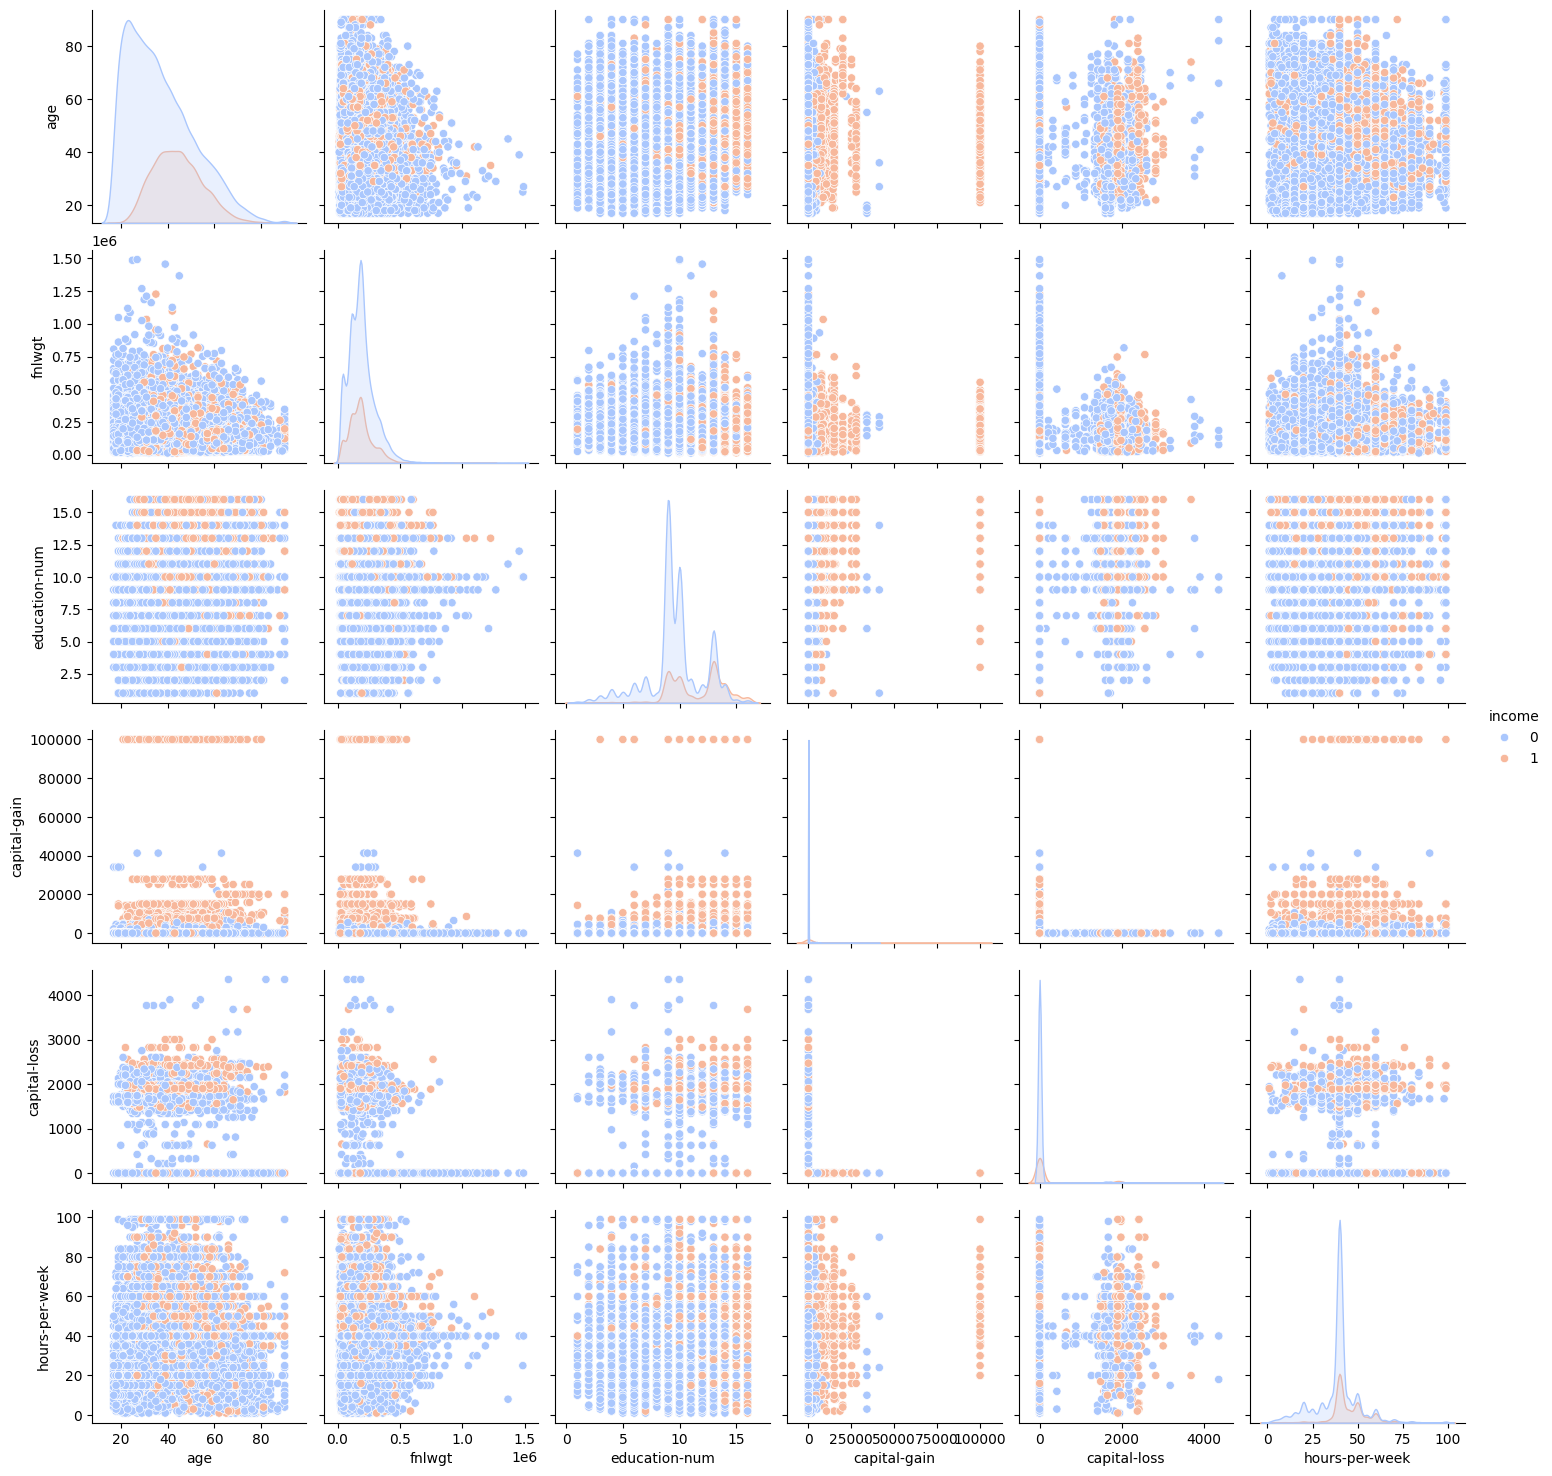

In [33]:
# Assuming 'income' is the target column in y DataFrame
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Merge X and y on a common index or column
merged_data = pd.merge(X[numeric_features], y, left_index=True, right_index=True)

# Pairplot to visualize relationships between numerical features and income
sns.pairplot(merged_data, hue='income', palette='coolwarm')
plt.show()

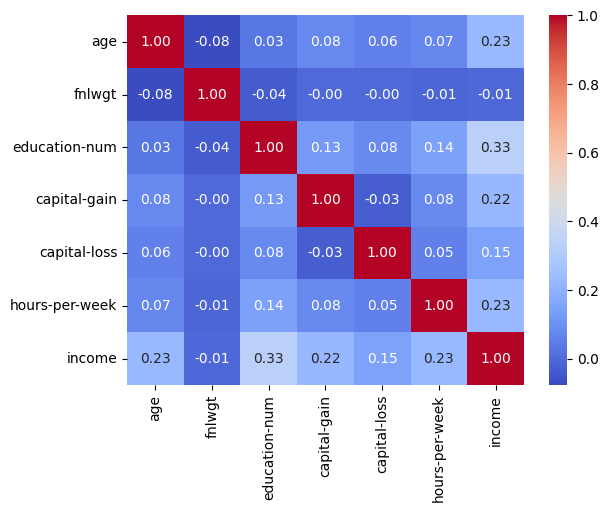

In [34]:
# Correlation matrix between numerical values and income
correlation_matrix = merged_data.corr()
g = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\2714231276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="education-num", y="income", data=X, kind="bar", height=6, palette="muted")


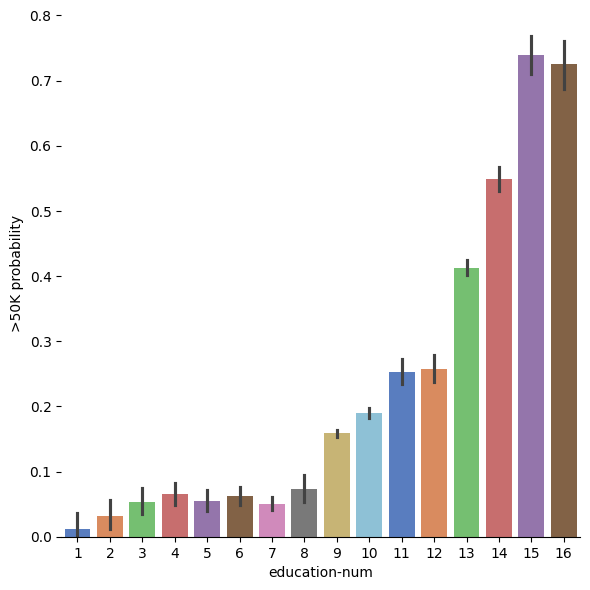

In [39]:

# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Education Num vs Income
g = sns.catplot(x="education-num", y="income", data=X, kind="bar", height=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

# Show the plot
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\2177891896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="hours-per-week", y="income", data=X, kind="bar", height=6, palette="muted")


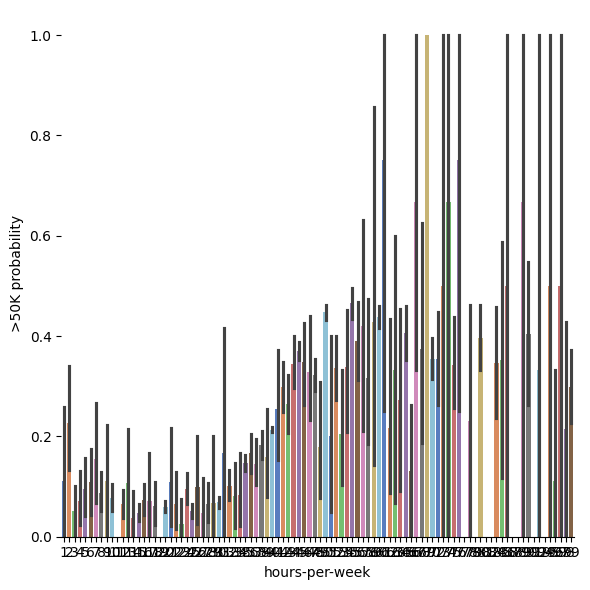

In [40]:

# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Education Num vs Income
g = sns.catplot(x="hours-per-week", y="income", data=X, kind="bar", height=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

# Show the plot
plt.show()


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*

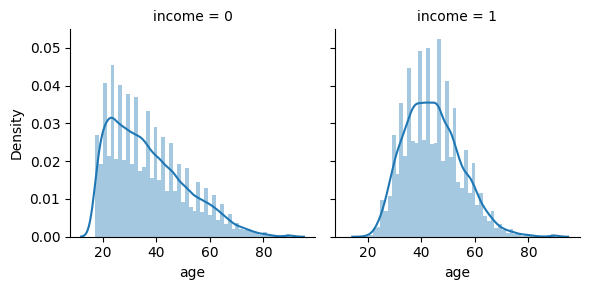

In [44]:
# Explore Age vs Income
g = sns.FacetGrid(X, col='income')
g = g.map(sns.distplot, "age")
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\3425542185.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better visibility


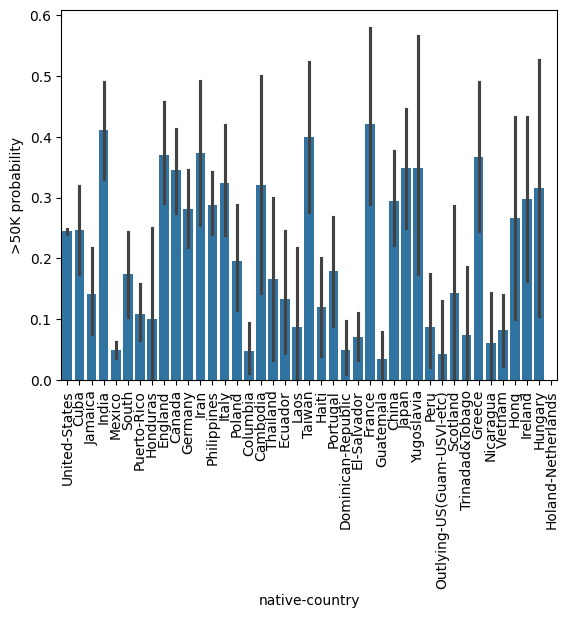

In [48]:
# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Native Country vs Income
g = sns.barplot(x="native-country", y="income", data=X)
g.set_ylabel(">50K probability")  # Corrected method name
g.set_xticklabels(g.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_2540\479173062.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="sex", y="income", data=X, kind="bar", height=6, palette="muted")


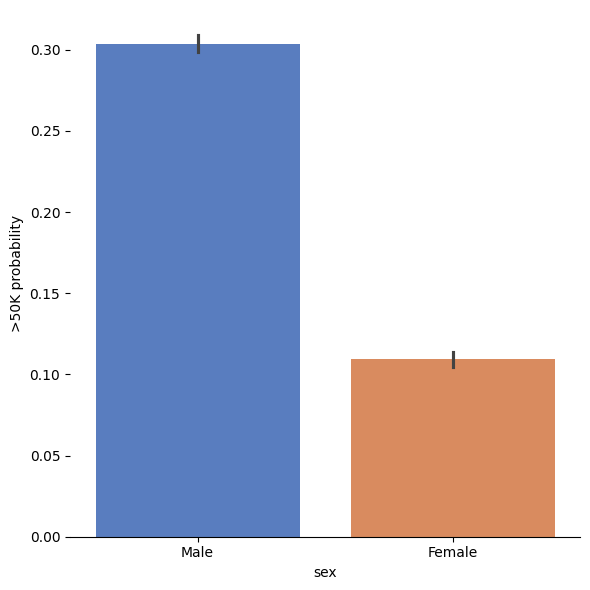

In [51]:

# Assuming 'income' is the target column in y DataFrame
X['income'] = y['income']

# Explore Education Num vs Income
g = sns.catplot(x="sex", y="income", data=X, kind="bar", height=6, palette="muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

# Show the plot
plt.show()


In [47]:
# from sklearn.preprocessing import OneHotEncoder

# categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# # Initialize the encoder
# encoder = OneHotEncoder(drop='first', sparse_output=False)

# # Fit and transform the categorical columns
# X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

# # Drop the original categorical columns from 'X'
# X = X.drop(categorical_columns, axis=1)

# # Concatenate the encoded features with the remaining numerical features
# X = pd.concat([X, X_encoded], axis=1)


In [43]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [45]:
# Initialize Naïve Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(X_train, y_train)

# Predictions on the test set
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Evaluate Naïve Bayes model
print("Naïve Bayes Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, naive_bayes_predictions))
print("Classification Report:\n", classification_report(y_test, naive_bayes_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, naive_bayes_predictions))


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naïve Bayes Model Evaluation:
Accuracy: 0.5284061828232163


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.54      0.95      0.69      4936
      <=50K.       0.00      0.00      0.00      2478
        >50K       0.42      0.28      0.34      1562
       >50K.       0.35      0.02      0.04       793

    accuracy                           0.53      9769
   macro avg       0.33      0.31      0.27      9769
weighted avg       0.37      0.53      0.41      9769

Confusion Matrix:
 [[4707    0  229    0]
 [2344    0  134    0]
 [1093    0  439   30]
 [ 544    0  233   16]]


In [46]:
# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("Classification Report:\n", classification_report(y_test, random_forest_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, random_forest_predictions))


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Model Evaluation:
Accuracy: 0.5276896304637118
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.59      0.80      0.68      4936
      <=50K.       0.30      0.14      0.19      2478
        >50K       0.48      0.51      0.50      1562
       >50K.       0.23      0.09      0.13       793

    accuracy                           0.53      9769
   macro avg       0.40      0.39      0.37      9769
weighted avg       0.47      0.53      0.48      9769

Confusion Matrix:
 [[3937  616  309   74]
 [1945  340  160   33]
 [ 505  107  804  146]
 [ 258   54  407   74]]
